# <center> Enhancing Business Intelligence through Predictive Analytics: Recommendation System for Market Account Holders

Capstone Project 10/05/2025 - MSc in Data Analytics Y2 S1 CCT College Dublin - Student ID 2023063

Data: marketing_campaign.csv

Github: https://github.com/ASM2023063/mscda-20241-capstone

CRISP-DM Methodology

1. Research Understanding Phase 
2. Data Understanding Phase
3. Data Preparation Phase
4. Modelling Phase
5. Evaluation Phase


## 1. Research Understanding

Attributes

People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## 2. Data Understanding

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np


# To suppress the warnings
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Read csv

data = pd.read_csv('marketing_campaign.csv')
data.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.tail()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,...,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,...,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,...,3,0,0,0,0,0,0,3,11,0
2239,2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,...,7,0,0,0,0,0,0,3,11,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [5]:
data.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


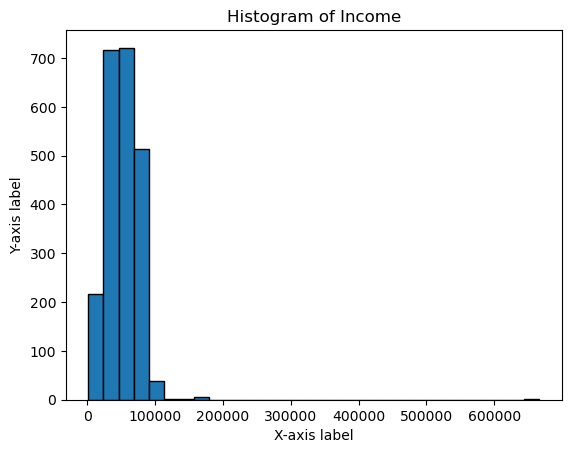

In [6]:
# Example: Histogram of a numerical column
plt.hist(data['Income'], bins=30, edgecolor='k')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Histogram of Income')
plt.show()

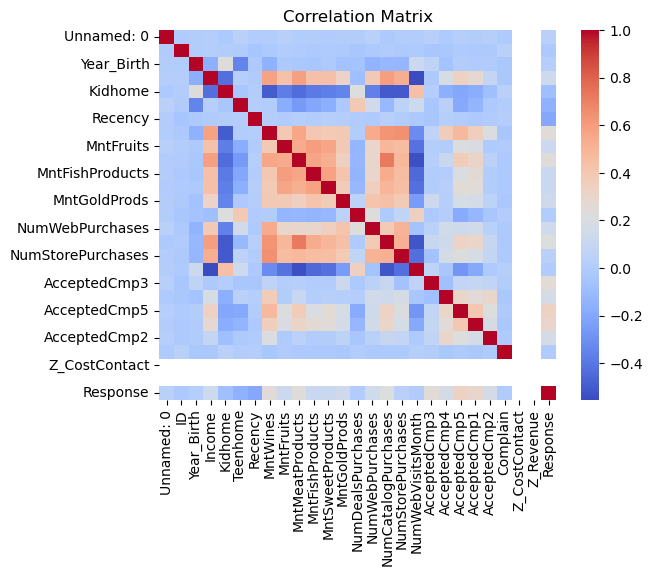

In [7]:
# Example: Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

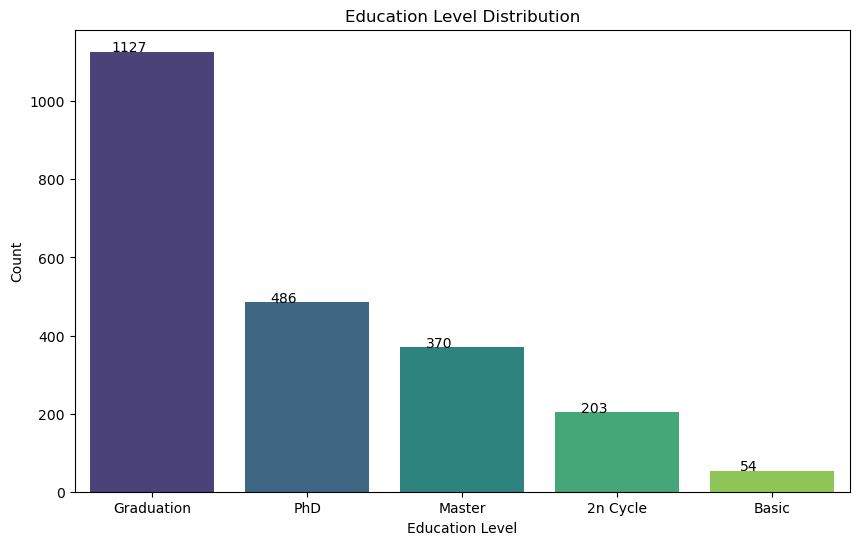

In [8]:
# Count the occurrences of each education level
education_counts = data['Education'].value_counts()

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')

# Add quantity labels on top of each bar
for bar, count in zip(bar_plot.patches, education_counts.values):
    bar_plot.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(count), ha='center', color='black', fontsize=10)

plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

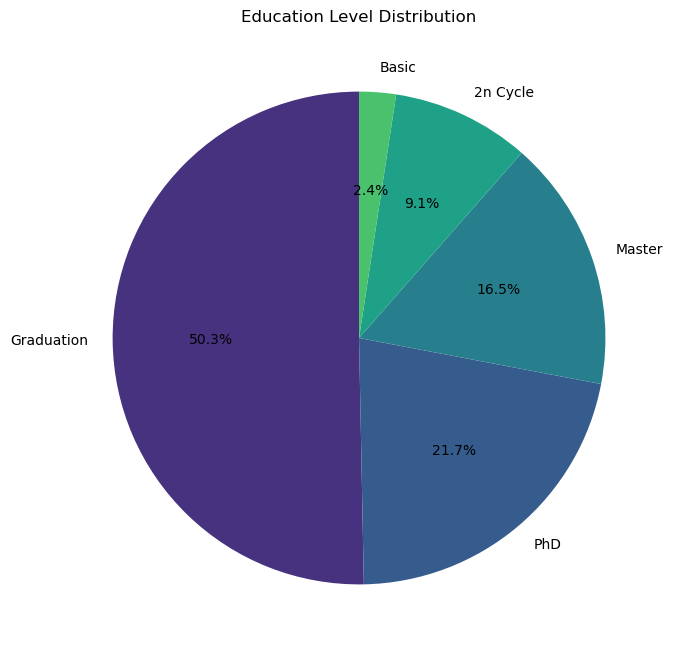

In [9]:
# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Education Level Distribution')
plt.show()

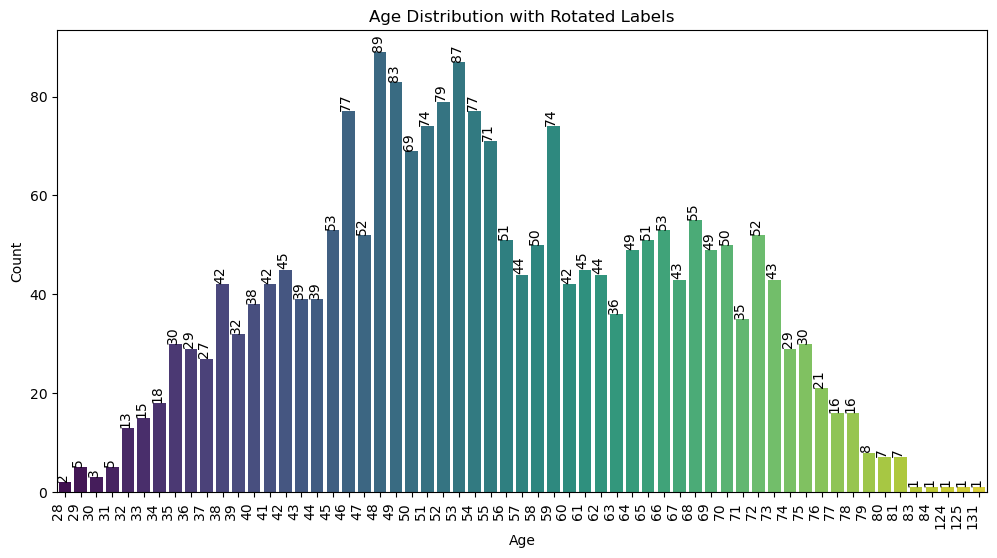

In [10]:
# Assuming 'Year_Birth' is the column containing birth years
current_year = dt.datetime.now().year
data['Age'] = current_year - data['Year_Birth']

# Count the occurrences of each age group
age_counts = data['Age'].value_counts().sort_index()

# Plot a bar chart with rotated x-axis labels and labels on top of the bars
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')

# Rotate x-axis labels
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90, ha='right')

# Add labels on top of the bars with rotation
for bar, count in zip(bar_plot.patches, age_counts.values):
    bar_plot.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(count), ha='center', va='bottom', rotation=90, color='black', fontsize=10)

plt.title('Age Distribution with Rotated Labels')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

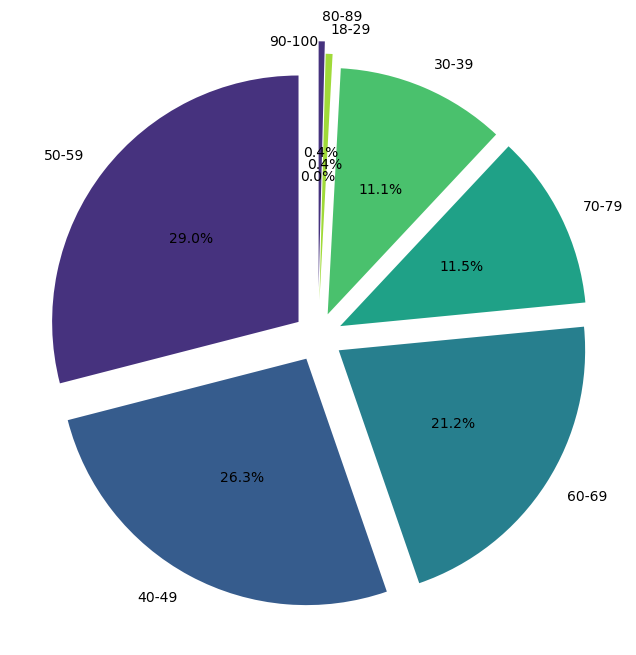

In [11]:
# Define age bins 
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Create age groups
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Count the occurrences of each age group
age_group_counts = data['Age_Group'].value_counts()

# Plot a pie chart with adjusted labels
plt.figure(figsize=(8, 8))
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.15, 0.2, 0.1)  # Adjust the explode values if needed
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.55, explode=explode, colors=sns.color_palette('viridis'))

#plt.title('Age Group Distribution')
plt.show()

## 3. Data Preparation

In [12]:
# Check for missing values

data.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Age_Group               3
dtype: int64

In [13]:
# Check duplicated rows
duplicate_rows_df = data[data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 32)


In [14]:
# NaN values
nan_values = data.isna().sum()

# Display the columns with NaN values and their counts
print("Columns with NaN values:")
print(nan_values[nan_values > 0])

Columns with NaN values:
Income       24
Age_Group     3
dtype: int64


In [15]:
# Display rows with NaN values
nan_rows = data[data.isna().any(axis=1)]

print("Rows with NaN values:")
print(nan_rows)

Rows with NaN values:
      Unnamed: 0     ID  Year_Birth   Education Marital_Status   Income  \
10            10   1994        1983  Graduation        Married      NaN   
27            27   5255        1986  Graduation         Single      NaN   
43            43   7281        1959         PhD         Single      NaN   
48            48   7244        1951  Graduation         Single      NaN   
58            58   8557        1982  Graduation         Single      NaN   
71            71  10629        1973    2n Cycle        Married      NaN   
90            90   8996        1957         PhD        Married      NaN   
91            91   9235        1957  Graduation         Single      NaN   
92            92   5798        1973      Master       Together      NaN   
128          128   8268        1961         PhD        Married      NaN   
133          133   1295        1963  Graduation        Married      NaN   
192          192   7829        1900    2n Cycle       Divorced  36640.0   
239

In [16]:
# Create a dataframe with dropped NaN

data_no_nan = data.dropna()

# Display the new dataframe
print("Original DataFrame shape: ", data.shape)
print("DataFrame shape after dropping NaN values: ", data_no_nan.shape)
print("\nDataFrame without NaN values:")
print(data_no_nan)

Original DataFrame shape:  (2240, 32)
DataFrame shape after dropping NaN values:  (2213, 32)

DataFrame without NaN values:
      Unnamed: 0     ID  Year_Birth   Education Marital_Status   Income  \
0              0   5524        1957  Graduation         Single  58138.0   
1              1   2174        1954  Graduation         Single  46344.0   
2              2   4141        1965  Graduation       Together  71613.0   
3              3   6182        1984  Graduation       Together  26646.0   
4              4   5324        1981         PhD        Married  58293.0   
...          ...    ...         ...         ...            ...      ...   
2235        2235  10870        1967  Graduation        Married  61223.0   
2236        2236   4001        1946         PhD       Together  64014.0   
2237        2237   7270        1981  Graduation       Divorced  56981.0   
2238        2238   8235        1956      Master       Together  69245.0   
2239        2239   9405        1954         PhD    

In [17]:
# Check for NaN on new dataframe
nan_values2 = data_no_nan.isna().sum()

# Display the columns with NaN values and their counts
print("Columns with NaN values:")
print(nan_values2[nan_values2 > 0])

Columns with NaN values:
Series([], dtype: int64)


In [18]:
# Count rows according to different features

# Marital status
specific_value_count = data_no_nan['Marital_Status'].value_counts()
print("Count of column Marital_Status: \n", specific_value_count)

# Education
specific_value_count = data_no_nan['Education'].value_counts()
print("\nCount of column Education:\n", specific_value_count)

Count of column Marital_Status: 
 Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Count of column Education:
 Graduation    1116
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64


## 4. Modelling

### 4.1 Content-based filtering

Profile 

- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years



In [19]:
# Customer and product profiles

customer_profile_features = data_no_nan[['Year_Birth',
                                         'Education',
                                         'Marital_Status',
                                         'Income',
                                         'Kidhome',
                                         'Teenhome']]

product_purchase_features = data_no_nan[['MntWines',
                                         'MntFruits',
                                         'MntMeatProducts',
                                         'MntFishProducts',
                                         'MntSweetProducts',
                                         'MntGoldProds']]

In [20]:
product_purchase_features

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [21]:
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical features in the customer profile
customer_profile_features_encoded = pd.get_dummies(customer_profile_features, columns=['Education', 'Marital_Status'])

# Concatenate customer profile and product purchase features
combined_features = pd.concat([customer_profile_features_encoded, product_purchase_features], axis=1)

# Feature Scaling (Standard Scaling)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_features)


In [22]:
combined_features

,Year_Birth,Income,Kidhome,Teenhome,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,...,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1957,58138.0,0,0,0,0,1,0,0,0,...,1,0,0,0,635,88,546,172,88,88
1,1954,46344.0,1,1,0,0,1,0,0,0,...,1,0,0,0,11,1,6,2,1,6
2,1965,71613.0,0,0,0,0,1,0,0,0,...,0,1,0,0,426,49,127,111,21,42
3,1984,26646.0,1,0,0,0,1,0,0,0,...,0,1,0,0,11,4,20,10,3,5
4,1981,58293.0,1,0,0,0,0,0,1,0,...,0,0,0,0,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,0,0,1,0,0,0,...,0,0,0,0,709,43,182,42,118,247
2236,1946,64014.0,2,1,0,0,0,0,1,0,...,0,1,0,0,406,0,30,0,0,8
2237,1981,56981.0,0,0,0,0,1,0,0,0,...,0,0,0,0,908,48,217,32,12,24
2238,1956,69245.0,0,1,0,0,0,1,0,0,...,0,1,0,0,428,30,214,80,30,61


In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between customers
customer_similarity = cosine_similarity(scaled_features, scaled_features)


In [24]:
customer_similarity

array([[ 1.        , -0.01411498,  0.41024036, ...,  0.1430325 ,
         0.07723346, -0.5006774 ],
       [-0.01411498,  1.        , -0.2081629 , ..., -0.25796606,
        -0.21173749,  0.21510723],
       [ 0.41024036, -0.2081629 ,  1.        , ...,  0.2013613 ,
         0.34876114, -0.50622907],
       ...,
       [ 0.1430325 , -0.25796606,  0.2013613 , ...,  1.        ,
        -0.20627901, -0.47179217],
       [ 0.07723346, -0.21173749,  0.34876114, ..., -0.20627901,
         1.        , -0.15593086],
       [-0.5006774 ,  0.21510723, -0.50622907, ..., -0.47179217,
        -0.15593086,  1.        ]])

In [25]:
def recommend_products_for_new_customer(new_customer_profile, customer_similarity_matrix, scaler, product_purchase_features, top_n=2):
    # Encode the new customer data
    new_customer_encoded = pd.get_dummies(pd.DataFrame([new_customer_profile]).T, 
                                          columns=['Education', 'Marital_Status'],
                                          drop_first=True)
    
    # Ensure the new customer profile DataFrame has the same columns as the fit DataFrame
    missing_columns = set(customer_similarity_matrix.columns) - set(new_customer_encoded.columns)
    for column in missing_columns:
        new_customer_encoded[column] = 0
    
    # Scale the new customer profile using the same scaler
    scaled_new_customer = scaler.transform(new_customer_encoded)
    
    # Calculate similarity to existing customers
    similarities = cosine_similarity(scaled_new_customer, customer_similarity_matrix)
    
    # Get indices of top similar customers
    similar_customer_indices = similarities.argsort(axis=1)[:, ::-1][:, 1:top_n+1]  # Exclude the customer itself
    
    # Get the recommended products based on similar customers' purchases
    recommended_products = product_purchase_features.iloc[similar_customer_indices.flatten()].sum(axis=0).sort_values(ascending=False)
    
    return recommended_products.head(top_n)


In [26]:
# Define the new customer profile
new_customer_profile = [1990, 50000, 0, 1, 'PhD', 'Single']

# Call the function to recommend products for the new customer
recommended_products = recommend_products_for_new_customer(new_customer_profile, customer_similarity, scaler, product_purchase_features, top_n=2)

# Display the recommended products
print("Recommended Products:")
print(recommended_products)


KeyError: "None of [Index(['Education', 'Marital_Status'], dtype='object')] are in the [columns]"

## 5. Evaluation